In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
spotify_df = pd.read_csv("../data/Cleaned_Spotify_2024_Global_Streaming_Data.csv")
spotify_df.head()

,Country,Artist,Album,Genre,Release Year,Monthly Listeners (Millions),Total Streams (Millions),Total Hours Streamed (Millions),Avg Stream Duration (Min),Platform Type,Streams Last 30 Days (Millions),Skip Rate (%)
0,Germany,Taylor Swift,1989 (Taylor's Version),K-pop,2020,23.10,3695.53,14240.35,4.28,Free,118.51,2.24
1,Brazil,The Weeknd,After Hours,R&B,2023,60.60,2828.16,11120.44,3.90,Premium,44.87,23.98
2,United States,Post Malone,Austin,Reggaeton,2019,42.84,1425.46,4177.49,4.03,Free,19.46,4.77
3,Italy,Ed Sheeran,Autumn Variations,K-pop,2019,73.24,2704.33,12024.08,3.26,Premium,166.05,25.12
4,Italy,Ed Sheeran,Autumn Variations,R&B,2019,7.89,3323.25,13446.32,4.47,Free,173.43,15.82


In [5]:
#Group by genre and calculate the average total streams
avg_streams = spotify_df.groupby('Genre')['Total Streams (Millions)'].mean().sort_values(ascending=False)
avg_streams

Genre
R&B          2779.311707
K-pop        2760.691667
Classical    2739.955417
Pop          2686.797500
Indie        2661.669400
Rock         2558.947069
EDM          2466.699804
Jazz         2408.460000
Reggaeton    2404.313636
Hip Hop      2284.867551
Name: Total Streams (Millions), dtype: float64

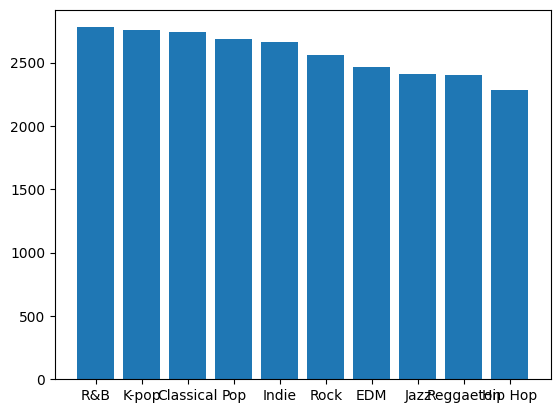

In [6]:
plt.bar(avg_streams.index, avg_streams.values)
plt.show()

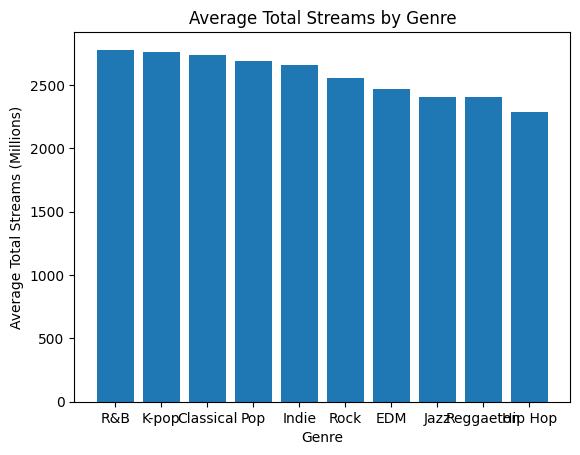

In [7]:
plt.bar(avg_streams.index, avg_streams.values)

plt.xlabel('Genre')
plt.ylabel('Average Total Streams (Millions)')
plt.title('Average Total Streams by Genre')

plt.show()

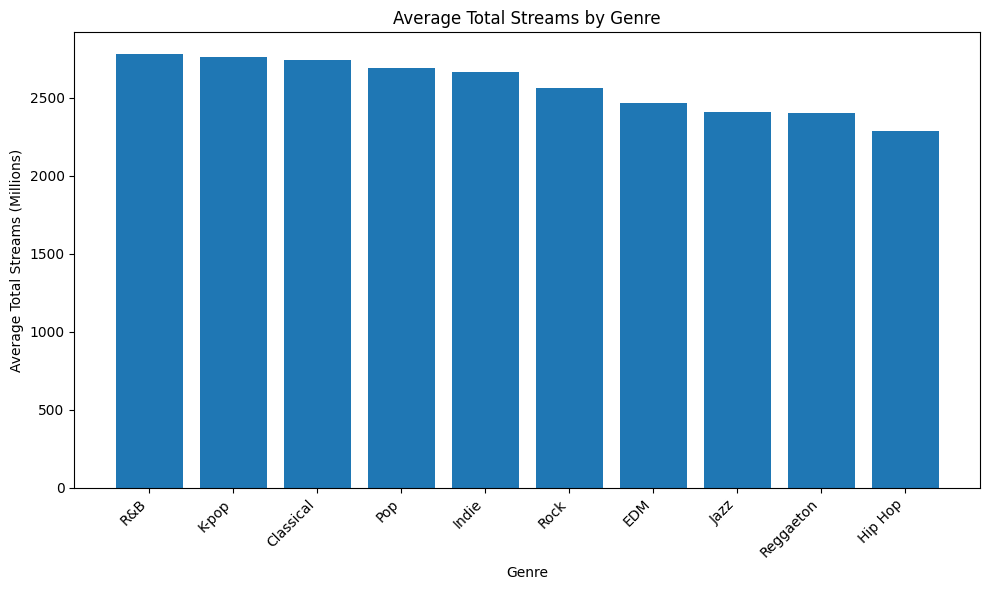

In [8]:
plt.figure(figsize=(10,6))
plt.bar(avg_streams.index, avg_streams.values)

plt.xlabel('Genre')
plt.ylabel('Average Total Streams (Millions)')
plt.title('Average Total Streams by Genre')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

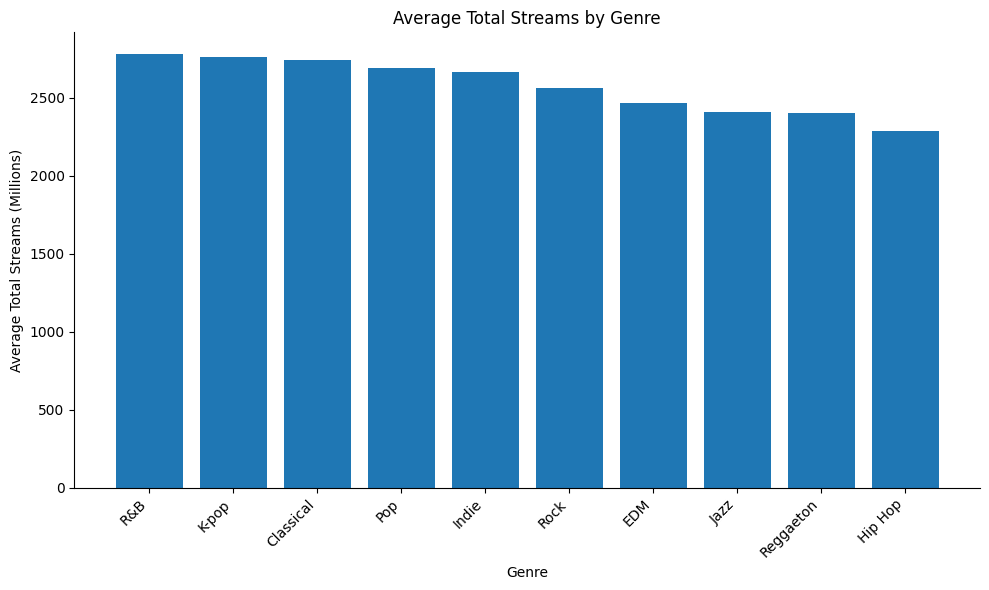

In [9]:
plt.figure(figsize=(10,6))
plt.bar(avg_streams.index, avg_streams.values)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.xlabel('Genre')
plt.ylabel('Average Total Streams (Millions)')
plt.title('Average Total Streams by Genre')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [10]:
avg_artist_streams = spotify_df.groupby('Artist')['Total Streams (Millions)'].mean().sort_values(ascending=False)
avg_artist_streams

Artist
Dua Lipa          3008.270000
Ariana Grande     2869.031111
BTS               2824.987955
BLACKPINK         2763.213243
Bad Bunny         2655.404000
Billie Eilish     2650.803548
Doja Cat          2649.965588
Drake             2611.255161
The Weeknd        2523.978000
Ed Sheeran        2510.267143
Olivia Rodrigo    2481.721765
Post Malone       2415.280323
Karol G           2344.262432
Taylor Swift      2270.203333
SZA               1919.527000
Name: Total Streams (Millions), dtype: float64

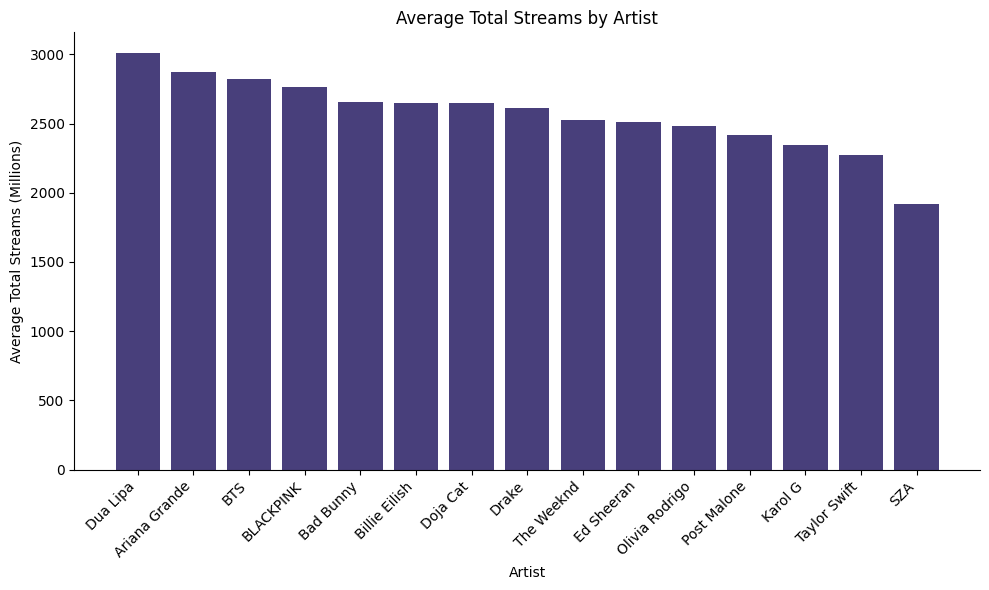

In [11]:
plt.figure(figsize=(10,6))
colors = ["#483f7b"]*len(avg_artist_streams)

max_index = avg_artist_streams.idxmax()
highlight_position = avg_artist_streams.index.get_loc(max_index)
colors[highlight_position] = "#536954"

plt.bar(avg_artist_streams.index, avg_artist_streams.values, color = "#483f7b", width =0.8)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.xlabel('Artist')
plt.ylabel('Average Total Streams (Millions)')
plt.title('Average Total Streams by Artist')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


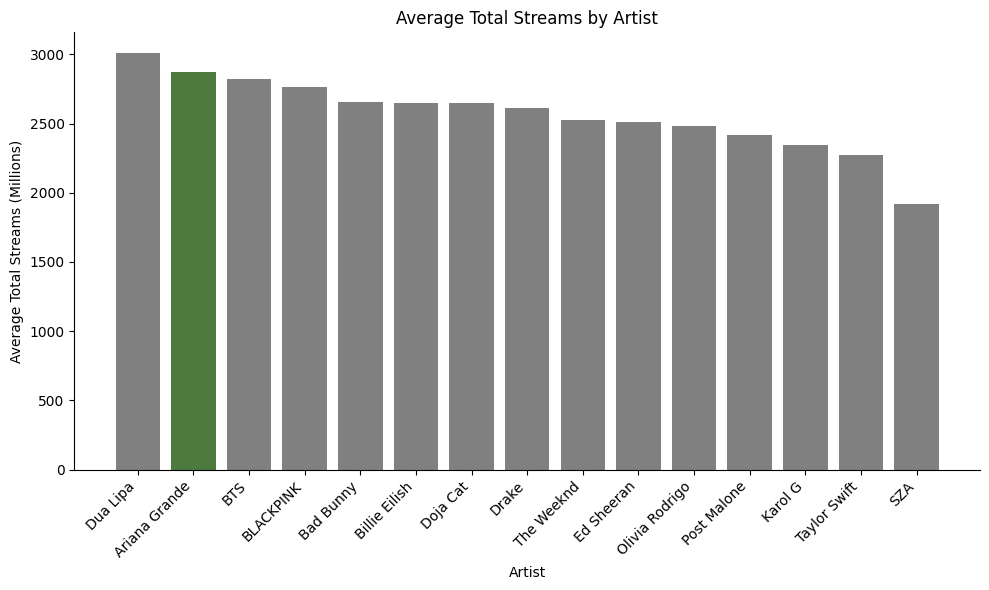

In [12]:
plt.figure(figsize=(10,6))

special_artist = 'Ariana Grande'
colors = ["#4d7b3f" if artist == special_artist else 'gray' for artist in avg_artist_streams.index]


plt.bar(avg_artist_streams.index, avg_artist_streams.values, color = colors)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.xlabel('Artist')
plt.ylabel('Average Total Streams (Millions)')
plt.title('Average Total Streams by Artist')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()




In [14]:
spotify_df.columns
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          500 non-null    object 
 1   Artist                           500 non-null    object 
 2   Album                            500 non-null    object 
 3   Genre                            500 non-null    object 
 4   Release Year                     500 non-null    int64  
 5   Monthly Listeners (Millions)     500 non-null    float64
 6   Total Streams (Millions)         500 non-null    float64
 7   Total Hours Streamed (Millions)  500 non-null    float64
 8   Avg Stream Duration (Min)        500 non-null    float64
 9   Platform Type                    500 non-null    object 
 10  Streams Last 30 Days (Millions)  500 non-null    float64
 11  Skip Rate (%)                    500 non-null    float64
dtypes: float64(6), int64(1

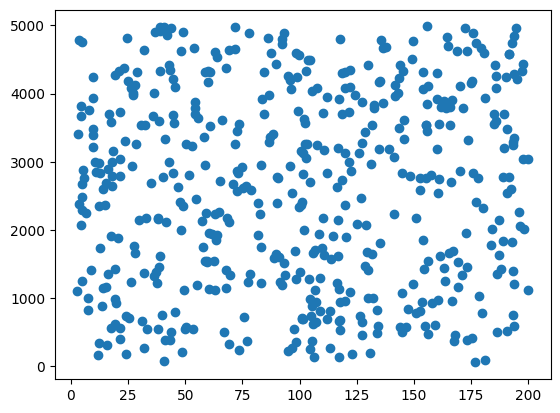

In [15]:
plt.scatter(spotify_df["Streams Last 30 Days (Millions)"], spotify_df["Total Streams (Millions)"])
plt.show()

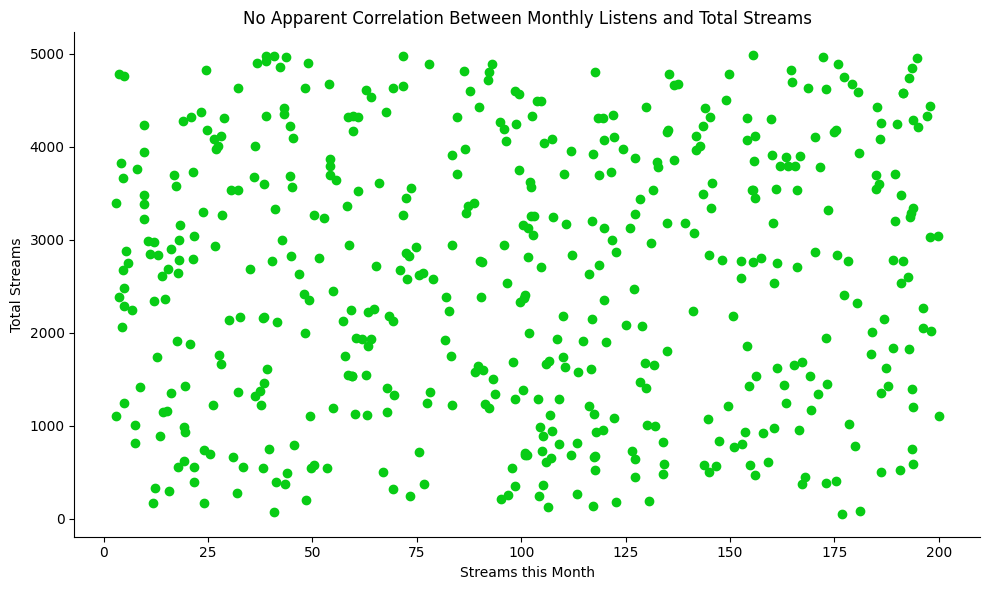

In [17]:
plt.figure(figsize=(10,6))

plt.scatter(
    spotify_df["Streams Last 30 Days (Millions)"], 
    spotify_df["Total Streams (Millions)"],
    color = "#08cc15")
plt.xlabel("Streams this Month")
plt.ylabel("Total Streams")
plt.title("No Apparent Correlation Between Monthly Listens and Total Streams")

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.show()